In [9]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.primitives import Estimator
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

In [10]:
x_param = Parameter("x")
theta = Parameter("θ")

qc = QuantumCircuit(1)
qc.ry(x_param, 0)       # Encode input
qc.ry(theta, 0)         # Trainable param

In [11]:
estimator = Estimator()
qnn = EstimatorQNN(
    circuit=qc,
    input_params=[x_param],
    weight_params=[theta],
    estimator=estimator
)
qnn_layer = TorchConnector(qnn)

In [12]:
model = nn.Sequential(
    qnn_layer,
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

In [21]:
def main(xs, ys):
    train_inputs = torch.tensor(xs, dtype=torch.float32).unsqueeze(1)
    train_targets = torch.tensor(ys, dtype=torch.float32).unsqueeze(1)


    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.05)
    num_epochs = 200
    loss_history = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        predictions = model(train_inputs)
        loss = loss_fn(predictions, train_targets)
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

    with torch.no_grad():
        predictions = model(train_inputs).squeeze().numpy()

    plt.figure(figsize=(8, 4))
    plt.plot(xs, ys, 'b-', label="Target")
    plt.plot(xs, predictions, 'r--', label="QNN Prediction")
    plt.xlabel("x")
    plt.ylabel("Value")
    plt.legend()
    plt.title("Quantum Neural Network Regression")
    plt.show()


    plt.figure(figsize=(8, 4))
    plt.plot(loss_history, 'm-')
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("QNN Training Loss")
    plt.grid(True)
    plt.show()

Epoch 0: Loss = 0.0246
Epoch 10: Loss = 0.0723
Epoch 20: Loss = 0.0328
Epoch 30: Loss = 0.0298
Epoch 40: Loss = 0.0275
Epoch 50: Loss = 0.0256
Epoch 60: Loss = 0.0242
Epoch 70: Loss = 0.0232
Epoch 80: Loss = 0.0224
Epoch 90: Loss = 0.0216
Epoch 100: Loss = 0.0208
Epoch 110: Loss = 0.0202
Epoch 120: Loss = 0.0197
Epoch 130: Loss = 0.0192
Epoch 140: Loss = 0.0188
Epoch 150: Loss = 0.0184
Epoch 160: Loss = 0.0181
Epoch 170: Loss = 0.0178
Epoch 180: Loss = 0.0175
Epoch 190: Loss = 0.0173


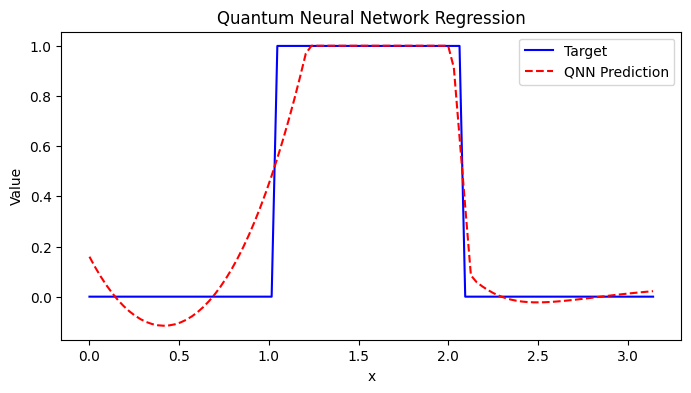

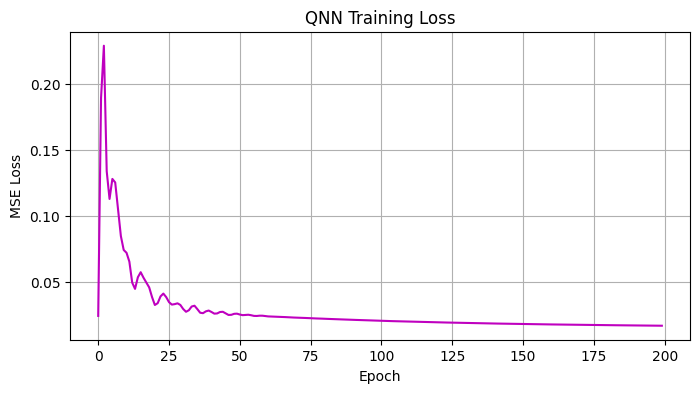

In [22]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 100)
    ys = np.where((xs >= np.pi/3) & (xs <= 2*np.pi/3), 1.0, 0.0)

    main(xs, ys)

Epoch 0: Loss = 0.5478
Epoch 10: Loss = 0.1990
Epoch 20: Loss = 0.1685
Epoch 30: Loss = 0.1406
Epoch 40: Loss = 0.1352
Epoch 50: Loss = 0.1279
Epoch 60: Loss = 0.1237
Epoch 70: Loss = 0.1193
Epoch 80: Loss = 0.1150
Epoch 90: Loss = 0.1020
Epoch 100: Loss = 0.0678
Epoch 110: Loss = 0.0481
Epoch 120: Loss = 0.0349
Epoch 130: Loss = 0.0226
Epoch 140: Loss = 0.0174
Epoch 150: Loss = 0.0147
Epoch 160: Loss = 0.0112
Epoch 170: Loss = 0.0093
Epoch 180: Loss = 0.1015
Epoch 190: Loss = 0.0621


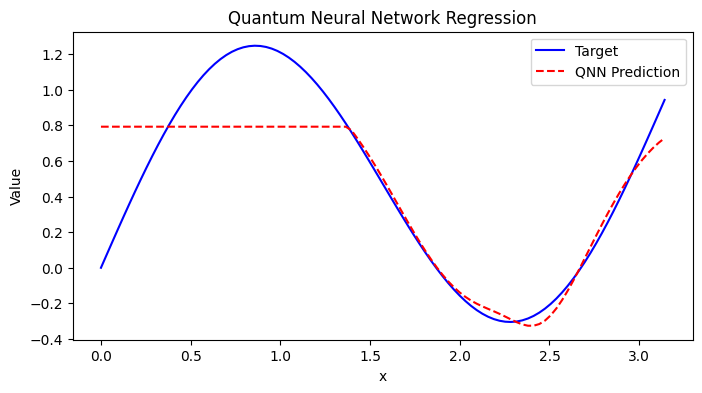

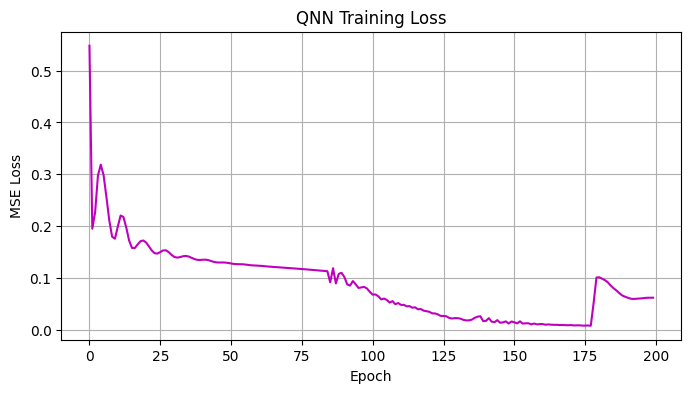

In [27]:
if __name__ == "__main__":
    # Target function: f(x) = sin(2x) + 0.3 * x
    xs = np.linspace(0, np.pi, 100)
    ys = np.sin(2 * xs) + 0.3 * xs

    main(xs, ys)

Epoch 0: Loss = 0.4748
Epoch 10: Loss = 0.0948
Epoch 20: Loss = 0.0918
Epoch 30: Loss = 0.0730
Epoch 40: Loss = 0.0476
Epoch 50: Loss = 0.0215
Epoch 60: Loss = 0.0119
Epoch 70: Loss = 0.0078
Epoch 80: Loss = 0.0063
Epoch 90: Loss = 0.0057
Epoch 100: Loss = 0.0055
Epoch 110: Loss = 0.0053
Epoch 120: Loss = 0.0049
Epoch 130: Loss = 0.0050
Epoch 140: Loss = 0.0048
Epoch 150: Loss = 0.0047
Epoch 160: Loss = 0.0047
Epoch 170: Loss = 0.0046
Epoch 180: Loss = 0.0046
Epoch 190: Loss = 0.0049


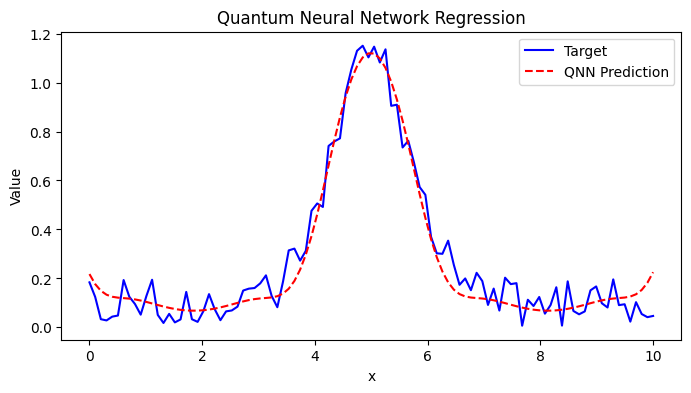

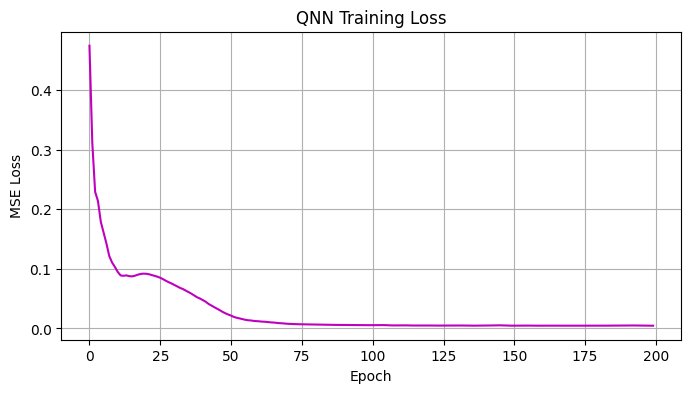

In [24]:
if __name__ == "__main__":
    xs = np.linspace(0, 10, 100)
    ys = np.exp(-(xs - 5)**2) + 0.2 * np.random.rand(100)

    main(xs, ys)

Epoch 0: Loss = 0.5086
Epoch 10: Loss = 0.1257
Epoch 20: Loss = 0.0623
Epoch 30: Loss = 0.0308
Epoch 40: Loss = 0.0318
Epoch 50: Loss = 0.0260
Epoch 60: Loss = 0.0228
Epoch 70: Loss = 0.0191
Epoch 80: Loss = 0.0155
Epoch 90: Loss = 0.0129
Epoch 100: Loss = 0.0119
Epoch 110: Loss = 0.0117
Epoch 120: Loss = 0.0117
Epoch 130: Loss = 0.0117
Epoch 140: Loss = 0.0117
Epoch 150: Loss = 0.0117
Epoch 160: Loss = 0.0117
Epoch 170: Loss = 0.0117
Epoch 180: Loss = 0.0117
Epoch 190: Loss = 0.0116


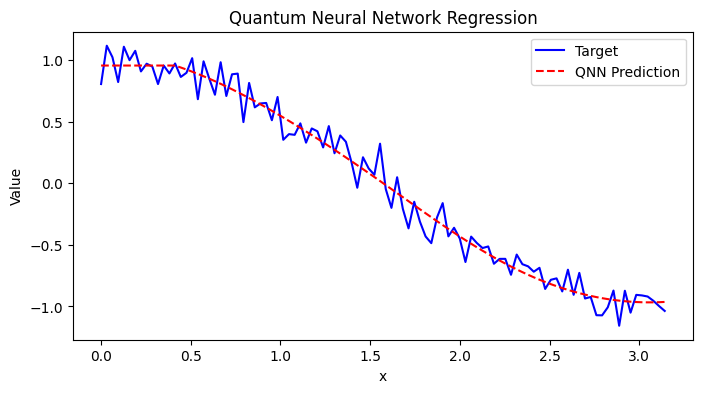

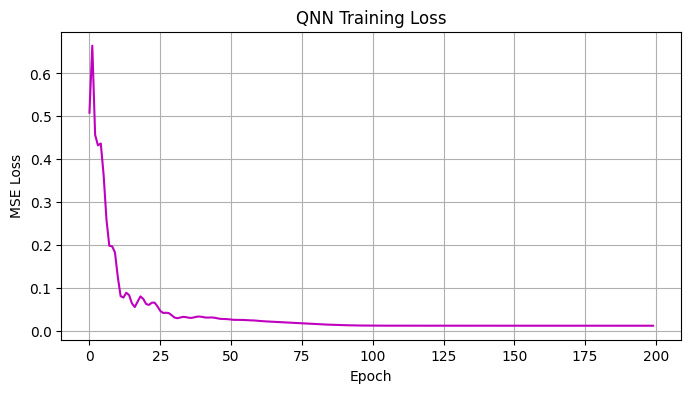

In [25]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 100)
    ys = np.cos(xs) + 0.1 * np.random.randn(len(xs))

    main(xs, ys)

Epoch 0: Loss = 0.0004
Epoch 10: Loss = 0.0124
Epoch 20: Loss = 0.0054
Epoch 30: Loss = 0.0025
Epoch 40: Loss = 0.0009
Epoch 50: Loss = 0.0002
Epoch 60: Loss = 0.0001
Epoch 70: Loss = 0.0001
Epoch 80: Loss = 0.0000
Epoch 90: Loss = 0.0000
Epoch 100: Loss = 0.0000
Epoch 110: Loss = 0.0000
Epoch 120: Loss = 0.0000
Epoch 130: Loss = 0.0000
Epoch 140: Loss = 0.0000
Epoch 150: Loss = 0.0000
Epoch 160: Loss = 0.0000
Epoch 170: Loss = 0.0000
Epoch 180: Loss = 0.0000
Epoch 190: Loss = 0.0000


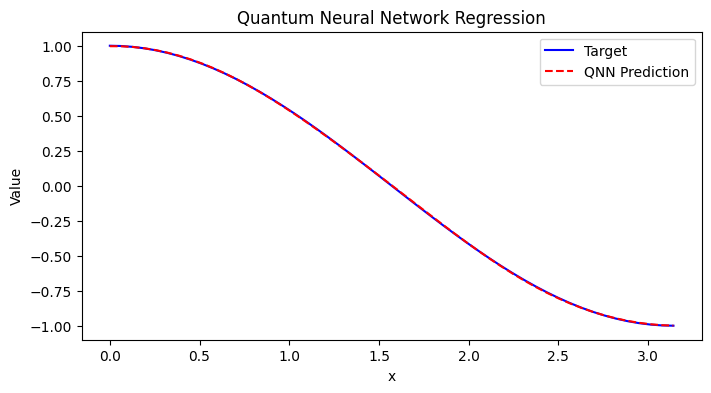

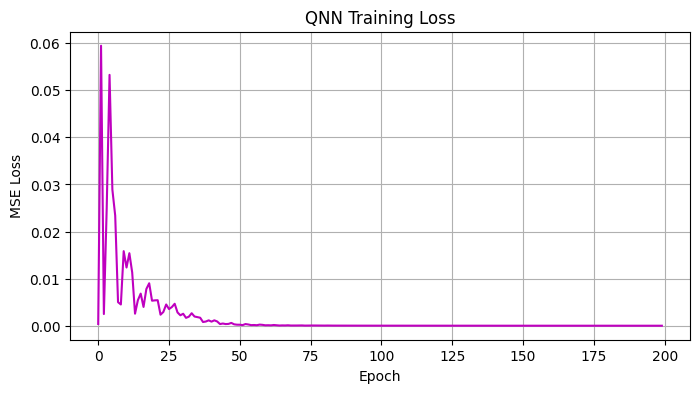

In [26]:
if __name__ == "__main__":
    xs = np.linspace(0, np.pi, 50)
    ys = np.cos(xs)

    main(xs, ys)